In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


## Logistic regression

In [15]:
X_train = pd.read_csv('../../data/representation.eng.train.csv')
X_train.head()

y_train = pd.read_csv('../../data/true_labels.eng.train.csv')
y_train.head()

X_test = pd.read_csv('../../data/representation.eng.testa.csv')
y_test = pd.read_csv('../../data/true_labels.eng.testa.csv')


X_train = X_train.to_numpy()

X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()



In [16]:
y_train = y_train.ravel()
y_test = y_test.ravel()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9664832416208105


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_test1 = pd.read_csv('../../data/representation.eng.testa.csv')
Y_test1 = pd.read_csv('../../data/true_labels.eng.testa.csv')
X_test2 = pd.read_csv('../../data/representation.eng.testb.csv')
Y_test2 = pd.read_csv('../../data/true_labels.eng.testb.csv')

datasets = [
    (X_test1, Y_test1),
    (X_test2, Y_test2)
]

for i, (X_test, Y_test) in enumerate(datasets, 1):
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=0)
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    
    print(f"Test Set {i}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 Score = {f1:.4f}")


Test Set 1: Accuracy = 0.9665, Precision = 0.9649, Recall = 0.9665, F1 Score = 0.9649
Test Set 2: Accuracy = 0.9700, Precision = 0.9679, Recall = 0.9700, F1 Score = 0.9688


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Neural Network

In [19]:
X_train = pd.read_csv('../../data/representation.eng.train.csv').to_numpy()

y_train = pd.read_csv('../../data/true_labels.eng.train.csv')

X_test = pd.read_csv('../../data/representation.eng.testa.csv').to_numpy()
X_test2 = pd.read_csv('../../data/representation.eng.testb.csv').to_numpy()
y_test = pd.read_csv('../../data/true_labels.eng.testa.csv')
y_test2 = pd.read_csv('../../data/true_labels.eng.testb.csv')



print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print (y_train.head())



(9999, 768) (9999, 1) (1999, 768) (1999, 1)
   O
0  O
1  O
2  O
3  O
4  O


In [20]:

y_train['O'] = y_train['O'].apply(lambda x: 1 if x == 'I-PER' else 0)

y_test['O'] = y_test['O'].apply(lambda x: 1 if x == 'I-PER' else 0)

y_test2['O'] = y_test2['O'].apply(lambda x: 1 if x == 'I-PER' else 0)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test2 = scaler.transform(X_test2)

# Neural network model
model = Sequential(
    [
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]

)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,329 (200.50 KB)

 Trainable params: 51,329 (200.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Model training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

def evaluate_model(model, X_test, y_test, test_set_name=""):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{test_set_name}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 Score = {f1:.4f}")

evaluate_model(model, X_test, y_test, "Test Set1 ")
evaluate_model(model, X_test2, y_test2, "Test Set2 ")



Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9983 - loss: 0.0037 - val_accuracy: 0.9860 - val_loss: 0.0974
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9974 - loss: 0.0166 - val_accuracy: 0.9890 - val_loss: 0.0824
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.0035 - val_accuracy: 0.9890 - val_loss: 0.0974
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9890 - val_loss: 0.1052
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9880 - val_loss: 0.1152
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9970 - loss: 0.0140 - val_accuracy: 0.9890 - val_loss: 0.0966
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9900 - val_loss: 0.0903
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9980 - loss: 0.0079 - val_accuracy: 0.

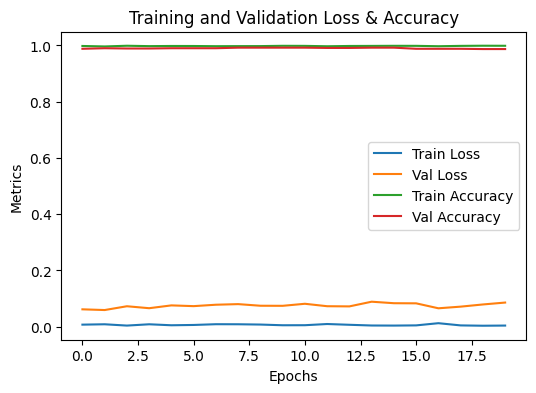

In [26]:
plt.figure(figsize=(6, 4))

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
#Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Loss &  Accuracy')
plt.legend()
plt.show()